In [1]:
import numpy as np
import pandas as pd 
from frites import set_mpl_style
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
set_mpl_style()

In [3]:
class BetaModel():
    def __init__(self,v_target,leak_factor=1):             
                
        self.a = 1  # the number of times this action returned a win       
        self.b = 1  # the number of times this action returned a loss
        self.n=0 # number of trials 
        self.omega=leak_factor
        self.vt=v_target #is the absolute value of the target velocity
        # pass the true probablity of the outcome|action taken              
    
    def outcome(self,q):        
        #return the boolean if 1 means that the eye and target have the same direction otherwwise the eye anticpates in
        #the wrong direction
        return stats.bernoulli.rvs(q) 
                    
    def update(self,reward):
        """ 
        reward here is the direction of the eye: 1 if it is the same as the target's direction otherwise 0
        
        """
        self.n += 1    
        
        if reward==1:
            self.a += 1
        
        else:
            self.b += 1
        
        self.a*=self.omega
        self.b*=self.omega
        
    def reset(self):
        self.n=0
        self.a=1
        self.b=1

    def sample(self):
         #return a value sampled from the beta distribution 
        return np.random.beta(self.a,self.b)
        #return np.mean(np.random.beta(self.a,self.b,10))

    def velocity(self):
        p=self.a/(self.a+self.b)
        #Linear Hypothesis
        return self.vt*(2*p-1)
        
   

In [4]:
stats.bernoulli.rvs(0.5)

1

In [5]:
v_target=10
agent=BetaModel(v_target)
mu=[]
V=[]
O=[]
k=1
#Probability of the target going right 
P=[0.25,.5,0.75]
p=0.9
for i in range(200):
    o=agent.outcome(p)
    O.append(o)
    V.append(agent.velocity())
    agent.update(o)
    mu.append(agent.a/(agent.a+agent.b))
print("The estimated probability of the target going right estimated by the agent is:",agent.a/(agent.a+agent.b))
agent.reset()
print("The antipatory velocity of the agent is ", V[-1])
v_theo=k*v_target*(2*p-1)
print("The optimal anticpatory theorical velocitiy is " ,v_theo)

The estimated probability of the target going right estimated by the agent is: 0.8861386138613861
The antipatory velocity of the agent is  7.711442786069651
The optimal anticpatory theorical velocitiy is  8.0


Text(0, 0.5, 'Anticipaotory velocity')

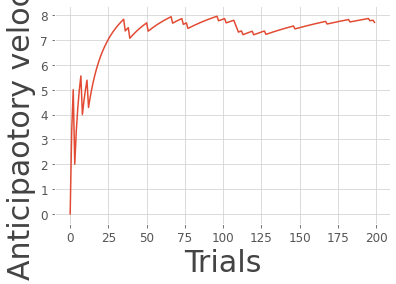

In [6]:
plt.plot(V)
plt.xlabel("Trials",fontsize=30)
plt.ylabel("Anticipaotory velocity",fontsize=30)

Text(0, 0.5, 'Infered Probability')

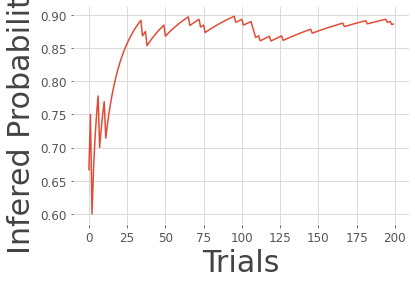

In [7]:
plt.plot(mu)
plt.xlabel("Trials",fontsize=30)
plt.ylabel("Infered Probability",fontsize=30)

In [8]:
Err=np.array(O)*(v_target-np.array(V))**2 + (1-np.array(O))*(v_target+np.array(V))**2

Text(0, 0.5, 'Error')

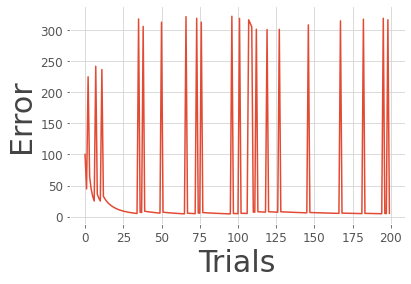

In [9]:
plt.plot(Err)
plt.xlabel("Trials",fontsize=30)
plt.ylabel("Error",fontsize=30)

In [10]:
theo_Err=p*(v_target-v_theo)**2 + (1-p)*(v_target+v_theo)**2
print("Empirical error of the agent is ", np.mean(Err))
print("Theoritical error of the agent is ",theo_Err)

Empirical error of the agent is  41.01633783190852
Theoritical error of the agent is  35.99999999999999


Text(0, 0.5, 'Anticpatory Velocity')

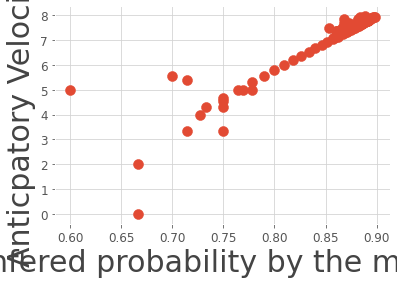

In [11]:
plt.scatter(mu,V,s=100)
plt.xlabel("Infered probability by the model",fontsize=30)
plt.ylabel("Anticpatory Velocity",fontsize=30)

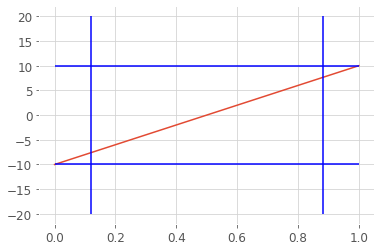

In [12]:
#Theoritical plot
P=np.linspace(0.0,1,100)
VV=v_target*(2*P-1)
plt.plot(P,VV)
plt.hlines(-v_target,0,1,colors="blue")
plt.hlines(v_target,0,1,colors="blue")
plt.vlines(1/(np.exp(2)+1),-20,20,colors="blue")
plt.vlines(1/(np.exp(-2)+1),-20,20,colors="blue")

In [13]:
1/(np.exp(2)+1)

0.11920292202211755

In [14]:
1/(np.exp(-2)+1)

0.8807970779778823